In [1]:
#importing pandas and reading the csv file using pandas
import pandas as pd
Mosquito=pd.read_csv('C:/Users/himaj/Desktop/ML_CA02/datasets/Mosquito_test.csv')

In [2]:
#importing libraries
import numpy as np
#importing the train_test_split to split the data into train set and test set
from sklearn.model_selection import train_test_split
#importing regression model to apply logistic regression
from sklearn.linear_model import LogisticRegression
# importing the metrics to check the accuracy
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
# importing preprocessing library 
from sklearn import preprocessing

In [3]:
#head command is used to display the first 10 rows of the dataset
Mosquito.head(5)

,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION
0,2014,39,40542,100XX W OHARE AIRPORT,T902,GRAVID,09/25/2014 12:09:00 AM,8,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
1,2016,37,44219,100XX W OHARE AIRPORT,T902,GRAVID,09/15/2016 12:09:00 AM,39,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
2,2017,33,45351,100XX W OHARE AIRPORT,T905,GRAVID,08/17/2017 12:08:00 AM,50,positive,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
3,2017,33,45345,100XX W OHARE AIRPORT,T900,GRAVID,08/17/2017 12:08:00 AM,17,positive,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
4,2016,37,44169,4XX W 127TH,T135,GRAVID,09/15/2016 12:09:00 AM,12,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN


In [4]:
#this is used to check the shape of the dataset, i.e it gives the number of cloumns and number of rows
Mosquito.shape

(29489, 13)

In [5]:
#removing the unnecessary columns
Mosquito_test_new=Mosquito.drop(['LATITUDE','LONGITUDE','LOCATION'],axis=1)

In [6]:
#checking for null values
print(Mosquito_test_new.isnull().sum())

SEASON YEAR             0
WEEK                    0
TEST ID                 0
BLOCK                   0
TRAP                    0
TRAP_TYPE               0
TEST DATE               0
NUMBER OF MOSQUITOES    0
RESULT                  0
SPECIES                 0
dtype: int64


In [7]:
Mosquito_test_new.columns = ['SEASON_YEAR', 'WEEK', 'TEST_ID', 'BLOCK', 'TRAP', 'TRAP_TYPE',
       'TEST_DATE', 'NUMBER_OF_MOSQUITOES', 'RESULT', 'SPECIES']

In [8]:
Mosquito_test_new.head(6)

,SEASON_YEAR,WEEK,TEST_ID,BLOCK,TRAP,TRAP_TYPE,TEST_DATE,NUMBER_OF_MOSQUITOES,RESULT,SPECIES
0,2014,39,40542,100XX W OHARE AIRPORT,T902,GRAVID,09/25/2014 12:09:00 AM,8,negative,CULEX PIPIENS/RESTUANS
1,2016,37,44219,100XX W OHARE AIRPORT,T902,GRAVID,09/15/2016 12:09:00 AM,39,negative,CULEX PIPIENS/RESTUANS
2,2017,33,45351,100XX W OHARE AIRPORT,T905,GRAVID,08/17/2017 12:08:00 AM,50,positive,CULEX PIPIENS/RESTUANS
3,2017,33,45345,100XX W OHARE AIRPORT,T900,GRAVID,08/17/2017 12:08:00 AM,17,positive,CULEX PIPIENS/RESTUANS
4,2016,37,44169,4XX W 127TH,T135,GRAVID,09/15/2016 12:09:00 AM,12,negative,CULEX PIPIENS/RESTUANS
5,2017,33,45348,100XX W OHARE,T904,GRAVID,08/17/2017 12:08:00 AM,43,positive,CULEX PIPIENS/RESTUANS


In [9]:
#from sklearn import preprocessing
#calling the labelencoder function 
number = preprocessing.LabelEncoder()
Mosquito_test_new['BLOCK'] = number.fit_transform(Mosquito_test_new.BLOCK)
Mosquito_test_new['TRAP'] = number.fit_transform(Mosquito_test_new.TRAP)
Mosquito_test_new['TRAP_TYPE'] = number.fit_transform(Mosquito_test_new.TRAP_TYPE)
Mosquito_test_new['RESULT'] = number.fit_transform(Mosquito_test_new.RESULT)

Mosquito_test_new['SPECIES'] = number.fit_transform(Mosquito_test_new.SPECIES)

In [10]:
### Feature selection for columns 
feature =['SEASON_YEAR', 'WEEK', 'TEST_ID', 'BLOCK', 'TRAP', 'TRAP_TYPE',
        'NUMBER_OF_MOSQUITOES', 'SPECIES']
target = ['RESULT']

In [11]:
X = Mosquito_test_new[feature] # Features
y = Mosquito_test_new[target] # Target variable

In [12]:
## Function for spliting the dataset into 70 percent testing data and 30 percent training data 
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)


In [13]:
# Create Decision Tree classifer object
model = LogisticRegression()

In [14]:
# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

C:\Users\himaj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\himaj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
#Predict the response for test dataset
y_pred = model.predict(x_test)

In [16]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9125127161749745


In [17]:
#confusion matrix to check the performance
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#finding the confusion matrix to check the performance
cnsfn_matrix=metrics.confusion_matrix(y_test,y_pred)

In [19]:
print(cnsfn_matrix)

[[8021   57]
 [ 717   52]]


Text(0.5, 1, 'Accuracy Score')

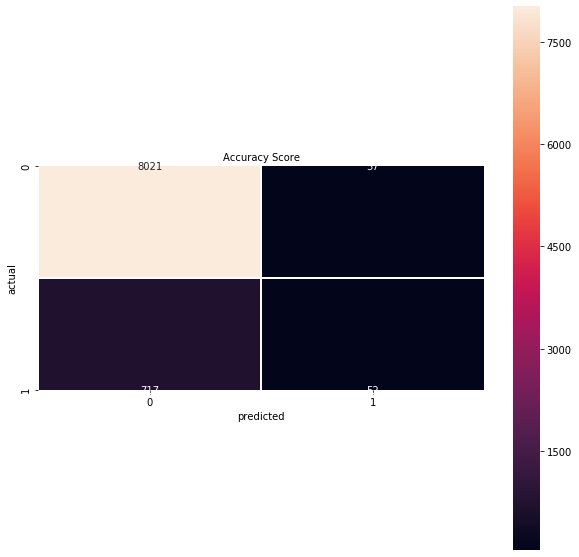

In [20]:
# heatmap to visualize the performance of the model
plt.figure(figsize=(10,10))
sns.heatmap(cnsfn_matrix,annot=True,fmt='g',linewidths=1,square=True)
plt.xlabel('predicted')
plt.ylabel('actual')
all_sample_title='Accuracy Score'.format(accuracy_score)
plt.title(all_sample_title,size=10)